In [1]:
def clean(df):
    df = df.dropna(how='all')
    df.loc[df.Destination=='Details','Destination'] = np.nan
    df["Vendor"] = df["Vendor"].fillna(1)
    df = df.fillna(method="ffill")
    df = df[df.Vendor!=1]
    df.loc[df["Destination"] == "Loading...","Destination"] = np.nan
    df = df.fillna(method="ffill")
    df = df.drop('#',axis=1)
    #df.Prefix = df.Prefix.astype(int)
    return df

In [2]:
import numpy as np 

In [3]:
import requests
import pandas as pd

In [4]:
from bs4 import BeautifulSoup

In [5]:
url = "http://tool.ariatelekom.com/billing/index.php?/login"

In [6]:
s = requests.Session()

In [7]:
r= s.get(url)

In [8]:
r = s.post("http://tool.ariatelekom.com/billing/index.php?/login/login_do",data={"username":"umut","password":"d8a9123w"})

In [9]:
r

<Response [200]>

In [10]:
soup = BeautifulSoup(r.content)

In [11]:
report_url = "http://tool.ariatelekom.com/billing/index.php?/reports/call_analysis"

In [12]:
start_date= end_date=None

In [13]:
params = {"i_vendor":"",
"i_connection": "",
"start_date_time_utc": "",
"end_date_time_utc": "",
"now_date_time_utc": "",
"hidden_by_connection": "1",
"hidden_i_routing": "",
"hidden_action": "",
"description": "",
"target": "",
"interval": "6",
"start_date": start_date,
"hour": "00",
"minute": "00",
"second": "00",
"start_time":"00:00:00",
"end_date": end_date,
"hour": "23",
"minute": "59",
"second": "59",
"end_time": "23:59:59",
"i_routing": "1",
"order": "2",
"by_connection": "1",
"action": "Update Report"}

In [14]:
dates = pd.date_range(start=pd.datetime(2018,8,1),end=pd.datetime(2018,8,31))

In [15]:
def get_by_date(date):
    params["start_date"] = params["end_date"] = date;
    r = s.post(report_url,data = params)
    return r

In [16]:
res = get_by_date(dates[::-1][0].strftime("%Y-%m-%d"))

In [17]:
for date in dates:
    print(date.strftime("%Y-%m-%d"))
    break

2018-08-01


In [18]:
dates[::-1][0]

Timestamp('2018-08-31 00:00:00', freq='-1D')

In [19]:
res.reason

'OK'

In [20]:
soupres =  BeautifulSoup(res.content)

In [21]:
soupres.find("h1")

In [22]:
df = pd.read_html(str(soupres.find_all('table',{'id':'result'})[0]))

In [24]:
df[0].head()

,#,Destination,Prefix,Vendor,Target,TC,SC,Min,ACD,ASR,Blended
0,62.0,Afghanistan,93,NaN,5,62.0,5.0,3.07,00:37,267.0,0.1600
1,62.0,Details,NaN,VENTATELE PRE 32,NaN,47.0,0.0,0.00,0,0.0,0.1600
2,62.0,Loading...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62.0,Details,NaN,TATA 26,NaN,46.0,0.0,0.00,0,0.0,0.1747
4,62.0,Loading...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df = clean(df[0])

In [27]:
import datetime

In [32]:
df["Min"].iloc[3]

3.07

In [29]:
import psycopg2
conn = psycopg2.connect('host=212.58.23.112 dbname=PlatformA user=umut_ro password=umut*123')
curr = conn.cursor()


In [32]:
curr.execute("select COUNT(*) from public.tcdr_summary limit 10;")

In [33]:
curr.fetchall()

[(2216744,)]

In [28]:
curr.execute('select id,name from destinations')

dest_id = curr.fetchall()

dest_id = dict(dest_id)

In [29]:
curr.execute('select id,vendor_name from vendors')

v_id = curr.fetchall()

v_id = dict(v_id)

In [63]:
df['vendor'] = df['Vendor'].str.replace(' \d+','').str.strip().str.replace('İ','I')

In [31]:
res = dict((v,k) for k,v in v_id.items())

In [33]:
df.replace({'vendor':res}).head()

,Destination,Prefix,Vendor,Target,TC,SC,Min,ACD,ASR,Blended,vendor
1,Afghanistan,93,VENTATELE PRE 32,5,47.0,0.0,0.00,0,0.0,0.1600,451
3,Afghanistan,93,TATA 26,5,46.0,0.0,0.00,0,0.0,0.1747,426
5,Afghanistan,93,IBASIS PRE 23,5,38.0,0.0,0.00,0,0.0,0.1770,173
7,Afghanistan,93,LENSOL PRE 39,5,24.0,5.0,3.07,00:37,2080.0,0.1754,218
9,Afghanistan,93,DAX 528,5,15.0,0.0,0.00,0,0.0,0.0750,122


In [373]:
df.vendor.iloc[0]

'VENTATELE PRE '

In [80]:
l = dates[0]

In [76]:
lw['date'] = "2018-09-16"

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
l

datetime.date(2018, 8, 1)

In [77]:
lw

,c_id,v_id,TC,SC,Min,Blended,date
1,1,451,42.0,0.0,0.00,0.1600,2018-09-16
3,1,426,37.0,0.0,0.00,0.1747,2018-09-16
5,1,218,28.0,5.0,2.23,0.1754,2018-09-16
7,1,173,21.0,0.0,0.00,0.1770,2018-09-16
9,1,122,13.0,0.0,0.00,0.0750,2018-09-16
11,1,249,12.0,0.0,0.00,0.1190,2018-09-16
13,1,459,2.0,0.0,0.00,0.1319,2018-09-16
15,1,453,2.0,0.0,0.00,0.1686,2018-09-16
17,1,224,1.0,0.0,0.00,0.1725,2018-09-16
19,1,23,1.0,0.0,0.00,0.1902,2018-09-16


In [68]:
def replace_with(df):
    #for country
    curr.execute('select id,name from destinations')
    dest_id = curr.fetchall()
    dest_id = dict(dest_id)
    res_dest = dict((v,k) for k,v in dest_id.items())
    df['c_id'] = df.replace({'Destination':res_dest})['Destination']
    #for vendor
    curr.execute('select id,vendor_name from vendors')
    v_id = curr.fetchall()
    v_id = dict(v_id)
    res = dict((v,k) for k,v in v_id.items())
    df['vendor'] = df['Vendor'].str.replace(' \d+','').str.strip().str.replace('İ','I')
    df['v_id'] = df.replace({'vendor':res})['vendor']
    df['date'] = df
    return df

In [64]:
df_c = df.copy()

In [69]:
lw = replace_with(df_c)[['c_id','v_id','TC','SC','Min','Blended']]

In [57]:
lw.columns = map(str.lower,lw.columns)

In [74]:
lw.head()

,c_id,v_id,TC,SC,Min,Blended
1,1,451,42.0,0.0,0.00,0.1600
3,1,426,37.0,0.0,0.00,0.1747
5,1,218,28.0,5.0,2.23,0.1754
7,1,173,21.0,0.0,0.00,0.1770
9,1,122,13.0,0.0,0.00,0.0750


In [54]:
%matplotlib inline

In [61]:
from sklearn.svm import SVC

In [62]:
from sklearn.cluster import KMeans

In [65]:
X = df.groupby("Vendor").sum()[["TC","SC"]]

In [63]:
kmeans = KMeans(n_clusters=  4)
kmeans.fit(df.groupby("Vendor").sum()[["TC","SC"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [72]:
y_kmeans = kmeans.predict(X.values)

In [73]:
X= X.values

In [68]:
import matplotlib.pyplot as plt

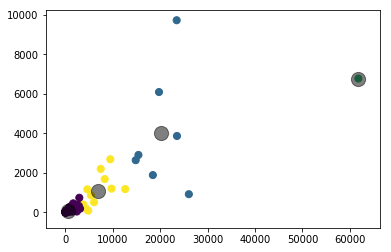

In [74]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

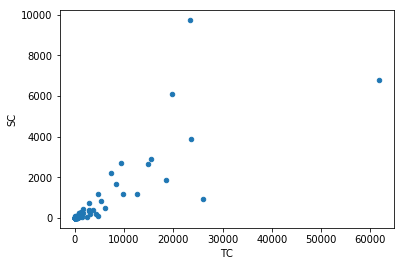

In [55]:
df.groupby("Vendor").sum()[["TC","SC"]].plot(x='TC',y='SC',kind="scatter")

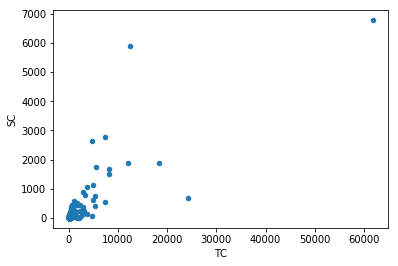

In [56]:
df[["TC","SC"]].plot(x='TC',y='SC',kind="scatter")

In [57]:
df[["TC","SC"]].shape

(2516, 2)

In [309]:
def sippy_regex(rule,number):
    rule = rule.rstrip('/')
    rule = rule.replace('s/','')
    rulesp = rule.split('/')
    if len(rulesp) >= 2:
        match_s,replace_s = rulesp
    else:
        match_s = rulesp[0]
        replace_s=''
    pattern_match = re.compile(match_s)
    m = pattern_match.match(number)
    if m:
        number = pattern_match.sub(replace_s,number)
    else:
        print('No match')
    return text


In [ ]:
re.compile('')

In [283]:
sippy_regex("s/.*/${R:[0-3,6]5}/","0111245")

'${R:[0-3,6]5}'

In [221]:
text = "0112345"

In [209]:
sippy_regex("s/^011/567/","0112345")

('^011', '')

In [290]:
re.compile("^101", re.M).search("1012465", 0)

<_sre.SRE_Match object; span=(0, 3), match='101'>

In [297]:
pattern_match = re.compile('.*')

In [ ]:
re.sub()

In [304]:
re.sub(r'${R:[0-3,6]5',"asd")

TypeError: sub() missing 1 required positional argument: 'string'

In [277]:
m.group(1)

IndexError: no such group

In [275]:
text.replace('','#504')

'#5040#5041#5041#5042#5043#5044#5045#504'

In [198]:
if m:
    to_rep = m.group()
    text = text.replace(to_rep,replace_s)
else:
    print('No match')

In [199]:
text

'2345'

In [86]:
pattern = re.compile("^011")

In [87]:
pattern.match("01123")

<_sre.SRE_Match object; span=(0, 3), match='011'>

In [327]:
s = "s/^101//"

In [328]:
s = s.rstrip('/')

In [171]:
import io,requests,psycopg2
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup


conn = psycopg2.connect('host=localhost dbname=blend user=postgres password=1')
curr = conn.cursor()
url = "http://tool.ariatelekom.com/billing/index.php?/login"
report_url = "http://tool.ariatelekom.com/billing/index.php?/reports/call_analysis"
start_date= end_date=None
params = {"i_vendor":"",
"i_connection": "",
"start_date_time_utc": "",
"end_date_time_utc": "",
"now_date_time_utc": "",
"hidden_by_connection": "1",
"hidden_i_routing": "",
"hidden_action": "",
"description": "",
"target": "",
"interval": "6",
"start_date": start_date,
"hour": "00",
"minute": "00",
"second": "00",
"start_time":"00:00:00",
"end_date": end_date,
"hour": "23",
"minute": "59",
"second": "59",
"end_time": "23:59:59",
"i_routing": "1",
"order": "2",
"by_connection": "1",
"action": "Update Report"}
s = requests.Session()
def clean(df):
    df = df.dropna(how='all')
    df.loc[df.Destination=='Details','Destination'] = np.nan
    df["Vendor"] = df["Vendor"].fillna(1)
    df = df.fillna(method="ffill")
    df = df[df.Vendor!=1]
    df.loc[df["Destination"] == "Loading...","Destination"] = np.nan
    df = df.fillna(method="ffill")
    df = df.drop('#',axis=1)
    #df.Prefix = df.Prefix.astype(int)
    return df

def get_by_date(date):
    params["start_date"] = params["end_date"] = date;
    r = s.post(report_url,data = params)
    return r

curr.execute('select id,name from destinations')
dest_id = curr.fetchall()
dest_id = dict(dest_id)
dest_id = dict((v,k) for k,v in dest_id.items())
curr.execute('select id,vendor_name from vendors')
v_id = curr.fetchall()
v_id = dict(v_id)
v_id = dict((v,k) for k,v in v_id.items())
def replace_with(df):
    #for country
    df['d_id'] = df.replace({'Destination':dest_id})['Destination']
    #for vendor
    df['vendor'] = df['Vendor'].str.replace(' \d+','').str.strip().str.replace('İ','I')
    df['v_id'] = df.replace({'vendor':v_id})['vendor']
    return df

s_buf = None
df=None
def run():
	dates = pd.date_range(start=pd.datetime(2018,8,1),end=pd.datetime(2018,8,31))
	s.get(url)
	r = s.post("http://tool.ariatelekom.com/billing/index.php?/login/login_do",data={"username":"umut","password":"d8a9123w"})
	for date in dates:
		date = date.strftime("%Y-%m-%d")
		res = get_by_date(date)
		soupres =  BeautifulSoup(res.content)
		df = pd.read_html(str(soupres.find_all('table',{'id':'result'})[0]))
		df = clean(df[0])
		df['date'] = date
		df = replace_with(df)[['date','c_id','v_id','TC','SC','Min','Blended']]
		df.columns = map(str.lower,df.columns)
		s_buf = io.StringIO()
		df.to_csv(s_buf)
		s_buf.seek(0)
		curr.copy_from(s_buf, 'blend_data(date,c_id,v_id,tc,sc,min,blended)')
		conn.commit()
		print(date+" imported!.")




In [172]:
df

In [173]:
dates = pd.date_range(start=pd.datetime(2018,8,1),end=pd.datetime(2018,8,31))
s.get(url)
r = s.post("http://tool.ariatelekom.com/billing/index.php?/login/login_do",data={"username":"umut","password":"d8a9123w"})
for date in dates:
    datew = date.strftime("%Y-%m-%d")
    res = get_by_date(datew)
    soupres =  BeautifulSoup(res.content)
    df = pd.read_html(str(soupres.find_all('table',{'id':'result'})[0]))
    df = clean(df[0])
    df['date'] = date
    df = replace_with(df)[['date','d_id','v_id','TC','SC','Min','Blended']]
    
    df.columns = map(str.lower,df.columns)
    df[['tc','sc']] = df[["tc","sc"]].astype("int")
    s_buf = io.StringIO()
    df.to_csv(s_buf,index=False)
    s_buf.seek(0)
    next(s_buf)
    curr.copy_from(s_buf, 'blend_data',columns=('date','d_id','v_id','tc','sc','min','blended'),sep=',')
    conn.commit()
    print(date+" imported!.")

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'str'

In [174]:
curr.execute("select * from blend_data")

In [175]:
curr.fetchall()

[(2563,
  451,
  55,
  0,
  Decimal('0.0'),
  Decimal('0.16'),
  datetime.date(2018, 8, 1),
  1),
 (2564,
  426,
  54,
  0,
  Decimal('0.0'),
  Decimal('0.1747'),
  datetime.date(2018, 8, 1),
  1),
 (2565,
  173,
  45,
  0,
  Decimal('0.0'),
  Decimal('0.177'),
  datetime.date(2018, 8, 1),
  1),
 (2566,
  249,
  42,
  0,
  Decimal('0.0'),
  Decimal('0.119'),
  datetime.date(2018, 8, 1),
  1),
 (2567,
  216,
  9,
  0,
  Decimal('0.0'),
  Decimal('0.161'),
  datetime.date(2018, 8, 1),
  1),
 (2568,
  459,
  9,
  0,
  Decimal('0.0'),
  Decimal('0.1507'),
  datetime.date(2018, 8, 1),
  1),
 (2569,
  267,
  7,
  0,
  Decimal('0.0'),
  Decimal('0.166'),
  datetime.date(2018, 8, 1),
  1),
 (2570,
  336,
  5,
  0,
  Decimal('0.0'),
  Decimal('0.167'),
  datetime.date(2018, 8, 1),
  1),
 (2571,
  65,
  2,
  0,
  Decimal('0.0'),
  Decimal('0.192'),
  datetime.date(2018, 8, 1),
  1),
 (2572,
  23,
  2,
  0,
  Decimal('0.0'),
  Decimal('0.1902'),
  datetime.date(2018, 8, 1),
  1),
 (2573,
  43,
  

In [168]:
conn.commit()

In [119]:
s = dates[0]

In [138]:
s_buf.seek(0)

0

In [139]:
next(s_buf)

'date,c_id,v_id,tc,sc,min,blended\n'

In [140]:
s_buf.readlines()

['2018-08-01,1,VENTATELE PRE,55.0,0.0,0.0,0.16\n',
 '2018-08-01,1,TATA,54.0,0.0,0.0,0.1747\n',
 '2018-08-01,1,IBASIS PRE,45.0,0.0,0.0,0.177\n',
 '2018-08-01,1,MEA FS,42.0,0.0,0.0,0.119\n',
 '2018-08-01,1,KT PRE YENI,9.0,0.0,0.0,0.161\n',
 '2018-08-01,1,VMTELE STD,9.0,0.0,0.0,0.1507\n',
 '2018-08-01,1,MTT,7.0,0.0,0.0,0.166\n',
 '2018-08-01,1,QUICKCOM STD FS,5.0,0.0,0.0,0.167\n',
 '2018-08-01,1,BICS,2.0,0.0,0.0,0.192\n',
 '2018-08-01,1,AIRTEL,2.0,0.0,0.0,0.1902\n',
 '2018-08-01,1,ANTAKO PRE,1.0,0.0,0.0,0.1684\n',
 '2018-08-01,1,VERIZON IPSEC,1.0,0.0,0.0,0.1686\n',
 '2018-08-01,2,LENSOL PRE,5.0,0.0,0.0,0.078\n',
 '2018-08-01,2,TATA,4.0,0.0,0.0,0.1068\n',
 '2018-08-01,2,VENTATELE PRE,3.0,0.0,0.0,0.16\n',
 '2018-08-01,2,LENSOL STD FS,1.0,0.0,0.0,0.081\n',
 '2018-08-01,2,LEXICO STD FS,1.0,1.0,0.05,0.0791\n',
 '2018-08-01,2,QUICKCOM STD FS,1.0,0.0,0.0,0.076\n',
 '2018-08-01,2,ANTAKO PRE,1.0,0.0,0.0,0.0762\n',
 '2018-08-01,2,ANTAKO STD FS,1.0,0.0,0.0,0.0762\n',
 '2018-08-01,2,VENTATELE WS,1.0,